In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [12]:
X,y = load_iris(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
import numpy as np
# 根据标签，计算gini系数
def get_gini(y):
    # 返回值就是两个，所以必须要用两个接收
    unique_values,unique_values_counts = np.unique(y,return_counts=True)
    p = unique_values_counts / y.size
    gini = 1 - (p**2).sum()
    return gini

In [37]:
get_gini(y_train)

np.float64(0.6648611111111111)

In [38]:
# 目的是找到决策树最合适的切分点
# 方法是遍历所有特征；一行是4个特征，总共是150行，取80%作为训练集是120行
# 总共是4个特征，遍历每一个特征
best_feature_idx = None
best_feature_value = None
best_gini_all = None
for feature_idx in range(4):
    # print(feature_idx)
    # 从训练集中取出每一个特征的值
    feature_values = X_train[:, feature_idx]
    # print(feature_values)
    # 遍历每一个特征的值
    for value in feature_values:
        # 我们计算 gini 的混乱程度是通过标签计算的。所以我们要的是标签

        # 把y_train训练集中小于value的所有样本数据取出来，组成 y_left
        y_left = y_train[X_train[:, feature_idx] <= value]
        weight_left = y_left.size / y_train.size

        # 把y_train训练集中大于value的所有样本数据取出来，组成 y_right
        y_right = y_train[X_train[:, feature_idx] > value]
        weight_right = y_right.size / y_train.size

        gini_left = get_gini(y_left)
        gini_right = get_gini(y_right)
        # 汇总gini
        gini_all = weight_left * gini_left + weight_right * gini_right
        if best_gini_all is None or gini_all <= best_gini_all:
            best_gini_all = gini_all
            best_feature_idx = feature_idx
            best_feature_value = value

print(f"最好的特征是: {best_feature_idx}, 最好的特征分割点是: {best_feature_value}")
       


最好的特征是: 3, 最好的特征分割点是: 0.6


In [40]:
set(X_train[:,3])

{np.float64(0.1),
 np.float64(0.2),
 np.float64(0.3),
 np.float64(0.4),
 np.float64(0.5),
 np.float64(0.6),
 np.float64(1.0),
 np.float64(1.1),
 np.float64(1.2),
 np.float64(1.3),
 np.float64(1.4),
 np.float64(1.5),
 np.float64(1.6),
 np.float64(1.7),
 np.float64(1.8),
 np.float64(1.9),
 np.float64(2.0),
 np.float64(2.1),
 np.float64(2.2),
 np.float64(2.3),
 np.float64(2.4),
 np.float64(2.5)}

In [43]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
X,y = make_regression(n_samples=100,n_features=4,random_state=0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [46]:

reg = DecisionTreeRegressor(max_depth=1)
reg.fit(X_train,y_train)
reg.predict(X_test)
reg.score(X_test,y_test)


0.37229783086199886

[Text(0.5, 0.75, 'x[3] <= -0.26\nsquared_error = 12527.615\nsamples = 80\nvalue = -2.109'),
 Text(0.25, 0.25, 'squared_error = 6520.436\nsamples = 22\nvalue = -121.612'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 7334.59\nsamples = 58\nvalue = 43.22'),
 Text(0.625, 0.5, '  False')]

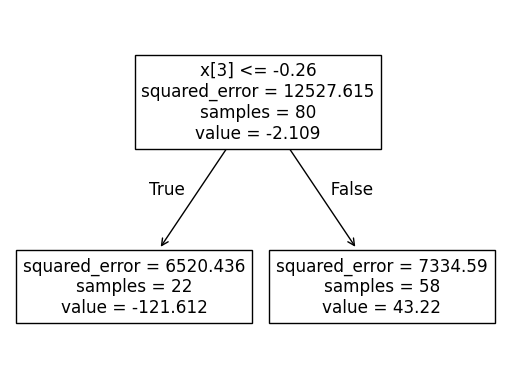

In [47]:

plot_tree(reg)

In [51]:
y_train.mean()
y_train.var()
print(f"y_train的均值是: {y_train.mean()}, y_train的方差是: {y_train.var()}")


y_train的均值是: -2.108973222880325, y_train的方差是: 12527.615365314592


np.float64(12527.615365314592)